# YearPredictionMSD Data Set
## Python for Data Analysis - Final Project
### CESAR Thomas, CHARRUEY Adrien - ESILV, A4, DIA 3

### Library Imports

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


### Data Set Import
The data set can be downloaded here : https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

In [98]:
df = pd.read_csv(r'C:\Users\adrie\Documents\ESILV 2021-2022\S7\Python for data analysis S7\Final Project CESAR CHARRUEY\YearPredictionMSD.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Data Preprocessing

In [99]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


We rename the first column of the dataframe

In [100]:
df.rename(columns={0:'year'}, inplace=True)

In [101]:
df.head()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


We check for null values

In [102]:
df.isnull().sum().sum()

0

We can see that there are no null values in the dataframe. We can proceed to the exploratory analysis.
### Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


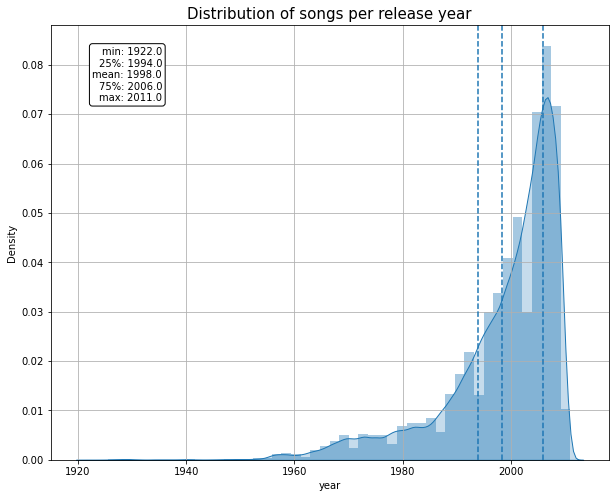

In [103]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('Distribution of songs per release year', fontsize=15)
variable = df['year']

sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = df['year'].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)

des = round(des).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.20, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1));

We can see that there is a peak in the year 2000s

### Principal Component Analysis (PCA)
To reduce the dimensionnality of the data, we perform a PCA.

In [108]:
# Separate target and features
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

pca = decomposition.PCA(n_components=20).fit(X)
X_pca = pca.transform(X)
print('X.shape : ', X.shape, '\nX_pca.shape : ', X_pca.shape)

cols = ['year']
for m in range(1, X_pca.shape[1]+1):
    cols.append("PrincComp{}".format(m))

# We re concatenate X_pca and y
df_pca = pd.DataFrame(np.append(y.reshape(y.shape[0],1), X_pca, axis=1), columns=cols)
#df_pca["Decade"] = df_pca["Decade"].astype(int)
print('df_pca.shape : ', df_pca.shape)
df_pca.head()

X.shape :  (515345, 90) 
X_pca.shape :  (515345, 20)
df_pca.shape :  (515345, 21)


,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
0,2001.0,-2415.709246,28.475381,123.781901,-102.257828,99.707681,-77.035274,-248.802156,30.293876,-155.357613,...,-84.484165,-13.795727,63.085155,164.715797,25.465986,-70.710509,7.578969,15.700226,-8.231060,-25.701082
1,2001.0,-1439.821294,1129.524017,-233.777907,12.319122,301.114817,173.158268,173.540454,-175.963179,228.313156,...,-234.725066,22.481218,122.369946,-21.660936,96.413084,32.468195,79.852220,-76.300638,-240.997926,58.865814
2,2001.0,-2343.676031,21.817130,32.984210,-54.366457,-13.078651,-385.517735,-134.332993,100.919681,-133.432885,...,-41.083557,102.327373,237.937612,123.803359,92.156539,139.531528,59.525392,-135.296286,-11.383410,-8.540353
3,2001.0,-1404.432485,1243.169773,-271.679414,126.846159,-428.941484,59.372697,-462.262548,-2.777416,166.186119,...,123.549057,140.680023,123.288653,44.938633,-300.705891,-78.303902,-36.011713,110.557795,53.673218,-47.747717
4,2001.0,-2409.952844,542.542474,175.953590,-12.981342,21.812305,-232.403174,-240.805887,116.736829,1.588024,...,-33.908907,-154.692606,43.375291,32.732174,18.945200,-35.921275,-22.047483,27.533292,-33.301085,5.871699


### Splitting the data set
We follow the instruction given on the data set page on the UCI Machine Learning Repository and split the data set this way :

train: first 463,715 examples

test: last 51,630 examples

Which according to the website "avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set."

In [105]:
df_train=df_pca.iloc[:463715,:]
print(df_train.shape)
df_test=df_pca.iloc[463715:,:]
print(df_test.shape)

(463715, 21)
(51630, 21)


In [121]:
df_train.describe()

,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
count,463715.000000,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,...,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05
mean,1998.386095,2.680011e-17,-3.458651e-18,5.168852e-18,1.300645e-18,8.397301e-18,1.013297e-17,6.011698e-18,2.307433e-18,-1.629799e-17,...,-5.682018e-18,1.867731e-17,-7.518461e-18,-6.924125e-18,-1.080553e-17,-1.037811e-17,-3.727318e-18,-1.361577e-18,6.461627e-18,-5.663822e-18
std,10.939767,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,1922.000000,-1.735927e+00,-2.119671e+01,-1.787166e+01,-2.601748e+01,-1.553928e+01,-1.775099e+01,-2.109202e+01,-2.248352e+01,-1.758021e+01,...,-1.925305e+01,-1.738521e+01,-2.836328e+01,-1.614777e+01,-3.055128e+01,-2.263198e+01,-1.563282e+01,-1.983052e+01,-2.371805e+01,-1.993907e+01
25%,1994.000000,-6.833324e-01,-4.420037e-01,-4.383166e-01,-4.065617e-01,-4.394403e-01,-4.599338e-01,-4.475174e-01,-4.040691e-01,-5.275503e-01,...,-4.891307e-01,-4.235599e-01,-4.545812e-01,-4.931442e-01,-3.940274e-01,-4.684719e-01,-4.426919e-01,-4.667242e-01,-4.573536e-01,-4.646189e-01
50%,2002.000000,-2.001914e-01,4.637119e-02,-6.318688e-02,6.876313e-02,-4.260553e-03,-1.652144e-02,-6.039679e-03,-3.230833e-02,-6.409850e-02,...,-2.089325e-02,3.539584e-02,1.966160e-03,2.623536e-04,1.332402e-02,-3.544902e-02,-6.793944e-03,-2.631714e-02,3.807330e-02,-2.697826e-03
75%,2006.000000,4.397139e-01,4.313036e-01,3.674232e-01,4.501734e-01,3.962548e-01,4.395705e-01,4.589572e-01,3.484783e-01,4.707214e-01,...,4.423004e-01,4.585524e-01,4.359776e-01,4.511396e-01,4.344685e-01,4.556458e-01,4.659022e-01,4.447977e-01,4.869702e-01,4.520684e-01
max,2011.000000,2.819249e+01,2.407036e+01,3.290962e+01,2.731611e+01,2.546479e+01,2.184985e+01,3.048975e+01,3.158587e+01,2.694578e+01,...,2.754185e+01,3.170779e+01,3.541578e+01,2.373788e+01,4.545961e+01,3.530410e+01,2.638603e+01,2.008013e+01,2.391988e+01,2.875436e+01


In [122]:
df_test.describe()

,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
count,51630.000000,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,...,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04
mean,1998.495758,1.488899e-17,-4.252146e-17,-7.798091e-18,4.630660e-17,6.491891e-18,8.116476e-18,-1.871015e-17,1.476588e-17,-1.748660e-17,...,-1.075172e-19,2.690941e-17,9.562449e-18,-1.073667e-17,8.752441e-18,-6.739933e-17,-2.659761e-17,-9.009945e-19,3.148320e-17,4.237900e-17
std,10.852015,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,1927.000000,-1.658502e+00,-1.359137e+01,-1.492732e+01,-2.457943e+01,-8.716883e+00,-9.301958e+00,-1.164726e+01,-1.240425e+01,-1.421237e+01,...,-1.380288e+01,-1.601899e+01,-1.717567e+01,-9.257217e+00,-1.585641e+01,-1.206535e+01,-1.185552e+01,-1.433670e+01,-1.712036e+01,-2.063325e+01
25%,1995.000000,-6.925905e-01,-4.444387e-01,-4.477297e-01,-4.044173e-01,-4.381513e-01,-4.752483e-01,-4.605809e-01,-4.164593e-01,-5.264041e-01,...,-4.980157e-01,-4.329240e-01,-4.585944e-01,-4.950710e-01,-4.010831e-01,-4.765829e-01,-4.300262e-01,-4.660291e-01,-4.515326e-01,-4.594218e-01
50%,2002.000000,-2.028107e-01,4.921729e-02,-6.205966e-02,6.742482e-02,-2.577632e-03,-3.005300e-02,-9.799430e-03,-3.264094e-02,-6.493222e-02,...,-2.747531e-02,3.662688e-02,-2.709444e-03,-5.935483e-04,1.602597e-02,-3.424595e-02,8.175854e-03,-2.615137e-02,3.853564e-02,-1.502969e-02
75%,2006.000000,4.521190e-01,4.328897e-01,3.718660e-01,4.523480e-01,3.917448e-01,4.367741e-01,4.588118e-01,3.569109e-01,4.663701e-01,...,4.526513e-01,4.722262e-01,4.357047e-01,4.439863e-01,4.425446e-01,4.725077e-01,4.664739e-01,4.436711e-01,4.875912e-01,4.338983e-01
max,2010.000000,1.828521e+01,1.631186e+01,1.930140e+01,1.493285e+01,2.462245e+01,1.152029e+01,1.525865e+01,1.756305e+01,1.728728e+01,...,1.774032e+01,1.418332e+01,1.066605e+01,3.235630e+01,1.352072e+01,1.351615e+01,1.713480e+01,1.491613e+01,1.580831e+01,1.687354e+01


### Scaling
We scale all the features, not the target

In [118]:
# create the scaler 
ss = preprocessing.StandardScaler() 

# apply the scaler to the dataframe subset 
df_train.iloc[:,1:] = ss.fit_transform(df_train.iloc[:,1:])
df_test.iloc[:,1:] = ss.fit_transform(df_test.iloc[:,1:])

In [123]:
df_train.describe()

,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
count,463715.000000,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,...,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05
mean,1998.386095,2.680011e-17,-3.458651e-18,5.168852e-18,1.300645e-18,8.397301e-18,1.013297e-17,6.011698e-18,2.307433e-18,-1.629799e-17,...,-5.682018e-18,1.867731e-17,-7.518461e-18,-6.924125e-18,-1.080553e-17,-1.037811e-17,-3.727318e-18,-1.361577e-18,6.461627e-18,-5.663822e-18
std,10.939767,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,1922.000000,-1.735927e+00,-2.119671e+01,-1.787166e+01,-2.601748e+01,-1.553928e+01,-1.775099e+01,-2.109202e+01,-2.248352e+01,-1.758021e+01,...,-1.925305e+01,-1.738521e+01,-2.836328e+01,-1.614777e+01,-3.055128e+01,-2.263198e+01,-1.563282e+01,-1.983052e+01,-2.371805e+01,-1.993907e+01
25%,1994.000000,-6.833324e-01,-4.420037e-01,-4.383166e-01,-4.065617e-01,-4.394403e-01,-4.599338e-01,-4.475174e-01,-4.040691e-01,-5.275503e-01,...,-4.891307e-01,-4.235599e-01,-4.545812e-01,-4.931442e-01,-3.940274e-01,-4.684719e-01,-4.426919e-01,-4.667242e-01,-4.573536e-01,-4.646189e-01
50%,2002.000000,-2.001914e-01,4.637119e-02,-6.318688e-02,6.876313e-02,-4.260553e-03,-1.652144e-02,-6.039679e-03,-3.230833e-02,-6.409850e-02,...,-2.089325e-02,3.539584e-02,1.966160e-03,2.623536e-04,1.332402e-02,-3.544902e-02,-6.793944e-03,-2.631714e-02,3.807330e-02,-2.697826e-03
75%,2006.000000,4.397139e-01,4.313036e-01,3.674232e-01,4.501734e-01,3.962548e-01,4.395705e-01,4.589572e-01,3.484783e-01,4.707214e-01,...,4.423004e-01,4.585524e-01,4.359776e-01,4.511396e-01,4.344685e-01,4.556458e-01,4.659022e-01,4.447977e-01,4.869702e-01,4.520684e-01
max,2011.000000,2.819249e+01,2.407036e+01,3.290962e+01,2.731611e+01,2.546479e+01,2.184985e+01,3.048975e+01,3.158587e+01,2.694578e+01,...,2.754185e+01,3.170779e+01,3.541578e+01,2.373788e+01,4.545961e+01,3.530410e+01,2.638603e+01,2.008013e+01,2.391988e+01,2.875436e+01


In [124]:
df_test.describe()

,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
count,51630.000000,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,...,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04,5.163000e+04
mean,1998.495758,1.488899e-17,-4.252146e-17,-7.798091e-18,4.630660e-17,6.491891e-18,8.116476e-18,-1.871015e-17,1.476588e-17,-1.748660e-17,...,-1.075172e-19,2.690941e-17,9.562449e-18,-1.073667e-17,8.752441e-18,-6.739933e-17,-2.659761e-17,-9.009945e-19,3.148320e-17,4.237900e-17
std,10.852015,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,1927.000000,-1.658502e+00,-1.359137e+01,-1.492732e+01,-2.457943e+01,-8.716883e+00,-9.301958e+00,-1.164726e+01,-1.240425e+01,-1.421237e+01,...,-1.380288e+01,-1.601899e+01,-1.717567e+01,-9.257217e+00,-1.585641e+01,-1.206535e+01,-1.185552e+01,-1.433670e+01,-1.712036e+01,-2.063325e+01
25%,1995.000000,-6.925905e-01,-4.444387e-01,-4.477297e-01,-4.044173e-01,-4.381513e-01,-4.752483e-01,-4.605809e-01,-4.164593e-01,-5.264041e-01,...,-4.980157e-01,-4.329240e-01,-4.585944e-01,-4.950710e-01,-4.010831e-01,-4.765829e-01,-4.300262e-01,-4.660291e-01,-4.515326e-01,-4.594218e-01
50%,2002.000000,-2.028107e-01,4.921729e-02,-6.205966e-02,6.742482e-02,-2.577632e-03,-3.005300e-02,-9.799430e-03,-3.264094e-02,-6.493222e-02,...,-2.747531e-02,3.662688e-02,-2.709444e-03,-5.935483e-04,1.602597e-02,-3.424595e-02,8.175854e-03,-2.615137e-02,3.853564e-02,-1.502969e-02
75%,2006.000000,4.521190e-01,4.328897e-01,3.718660e-01,4.523480e-01,3.917448e-01,4.367741e-01,4.588118e-01,3.569109e-01,4.663701e-01,...,4.526513e-01,4.722262e-01,4.357047e-01,4.439863e-01,4.425446e-01,4.725077e-01,4.664739e-01,4.436711e-01,4.875912e-01,4.338983e-01
max,2010.000000,1.828521e+01,1.631186e+01,1.930140e+01,1.493285e+01,2.462245e+01,1.152029e+01,1.525865e+01,1.756305e+01,1.728728e+01,...,1.774032e+01,1.418332e+01,1.066605e+01,3.235630e+01,1.352072e+01,1.351615e+01,1.713480e+01,1.491613e+01,1.580831e+01,1.687354e+01


### Feature selection

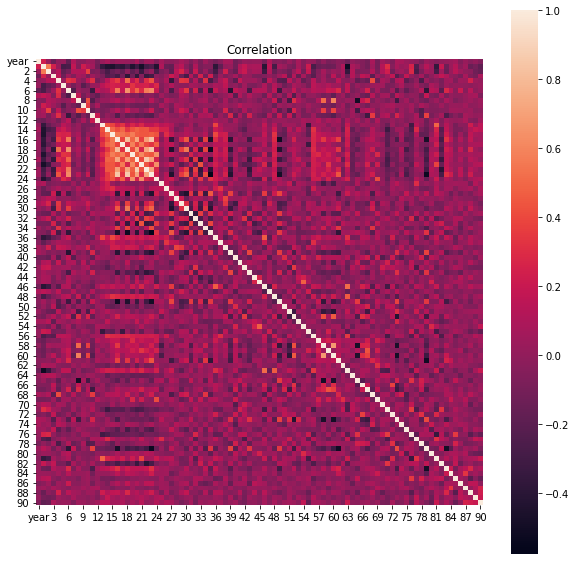

In [71]:
# Correlation between the release year and features
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation")
sns.heatmap(corr, square=True);

We focus on the correlation of the features to the year.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


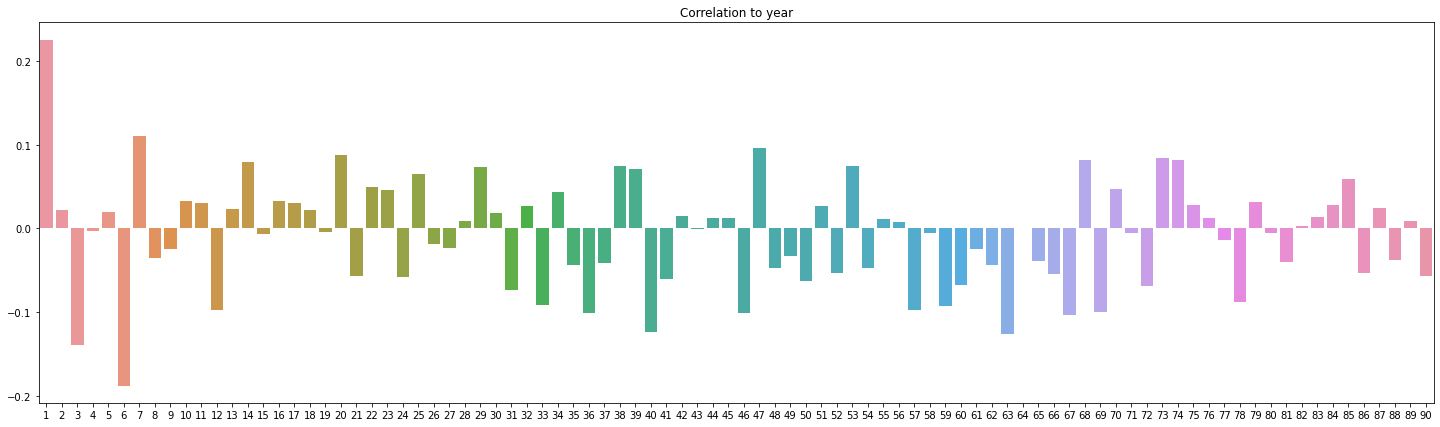

In [79]:
fig, ax = plt.subplots(figsize=(25,7)) 
sns.barplot(corr['year'][1:].index,corr['year'][1:].values)
plt.title('Correlation to year');